### About this dataset

* Age : Age of the patient
* Sex : Sex of the patient
* exng: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
    + Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack

### Import Libraries

In [1]:
shhh <- suppressPackageStartupMessages # to ignore warnings when loading libraries. May need to
                                        #remove while debugging.


#Libraries for data analysis and plotting
shhh(library(dplyr))       #select specific columns from dataset and more
library(ggplot2)     #graphs
shhh(library(gridExtra))   #plotting graphs side by side (in groups)
shhh(library(tidyr))
shhh(library(corrplot))    ## to plot correlation matrix from numerical variables

#Libraries for machine learning algorithms
library(caTools)     #divide training and test set
library(e1071)       #SVM fucntion for classification
library(ROCR)        #Accuracy analysis
shhh(library(caret))       #Accuracy analysis, confusion_matrix and more

#### **Importing the dataset**

In [2]:
dataset = read.csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")
head(dataset)

age sex cp trtbps chol fbs restecg thalachh exng oldpeak slp caa thall output
1 63  1   3  145    233  1   0       150      0    2.3     0   0   1     1     
2 37  1   2  130    250  0   1       187      0    3.5     0   0   2     1     
3 41  0   1  130    204  0   0       172      0    1.4     2   0   2     1     
4 56  1   1  120    236  0   1       178      0    0.8     2   0   2     1     
5 57  0   0  120    354  0   1       163      1    0.6     2   0   2     1     
6 57  1   0  140    192  0   1       148      0    0.4     1   0   1     1

### EDA

In [3]:
summary(dataset)

      age             sex               cp            trtbps     
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalachh    
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
      exng           oldpeak          slp             caa        
 Mi

In [4]:
str(dataset)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trtbps  : int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalachh: int  150 187 172 178 163 148 153 173 162 174 ...
 $ exng    : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slp     : int  0 0 2 2 2 1 1 2 2 2 ...
 $ caa     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thall   : int  1 2 2 2 2 1 2 3 3 2 ...
 $ output  : int  1 1 1 1 1 1 1 1 1 1 ...


As we can observe that all data types are of type int, we will separate categorical variables and numeric variables from the dataset and reformat categorical variables as factors. Lets do that and plot some graphs to analyse data. 

In [5]:
numeric_var <- dataset %>% dplyr::select("age","trtbps","chol","thalachh","oldpeak")
cata_var <- dataset %>% dplyr::select("sex","cp","fbs","restecg","exng","slp","caa",
                          "thall","output")
names <- c(1:9)
cata_var[,names] <-lapply(cata_var[,names],factor)
str(cata_var)

'data.frame':	303 obs. of  9 variables:
 $ sex    : Factor w/ 2 levels "0","1": 2 2 1 2 1 2 1 2 2 2 ...
 $ cp     : Factor w/ 4 levels "0","1","2","3": 4 3 2 2 1 1 2 2 3 3 ...
 $ fbs    : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 2 1 ...
 $ restecg: Factor w/ 3 levels "0","1","2": 1 2 1 2 2 2 1 2 2 2 ...
 $ exng   : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ slp    : Factor w/ 3 levels "0","1","2": 1 1 3 3 3 2 2 3 3 3 ...
 $ caa    : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ thall  : Factor w/ 4 levels "0","1","2","3": 2 3 3 3 3 2 3 4 4 3 ...
 $ output : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...


### Numerical Variables

#### 1.Histogram

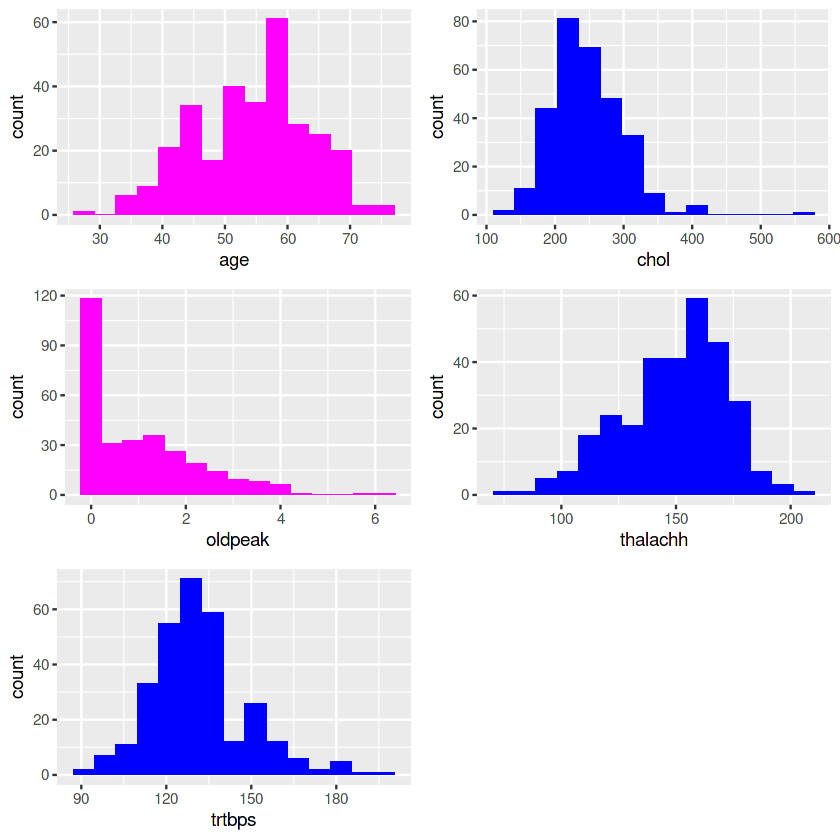

In [6]:
hist1 <- ggplot(numeric_var,aes(x=age))+geom_histogram(bins=15,fill='magenta')
hist2 <- ggplot(numeric_var,aes(x=chol))+geom_histogram(bins=15,fill='blue')
hist3 <- ggplot(numeric_var,aes(x=oldpeak))+geom_histogram(bins=15,fill='magenta')
hist4 <- ggplot(numeric_var,aes(x=thalachh))+geom_histogram(bins=15,fill='blue')
hist5 <- ggplot(numeric_var,aes(x=trtbps))+geom_histogram(bins=15,fill='blue')
grid.arrange(hist1,hist2,hist3,hist4,hist5,nrow=3)

'oldpeak' is right-skewed and 'age' appears to be slightly left skewed. There is an outlier in 'chol' and rest appear approx. normal. We will and normalize 'age', 'oldpeak' and scale(standardize) 'trtbps' before implementing the SVM algorithm.

#### 2. Correlation

age   trtbps chol  thalachh oldpeak
age       1.00  0.28   0.21 -0.40     0.21  
trtbps    0.28  1.00   0.12 -0.05     0.19  
chol      0.21  0.12   1.00 -0.01     0.05  
thalachh -0.40 -0.05  -0.01  1.00    -0.34  
oldpeak   0.21  0.19   0.05 -0.34     1.00

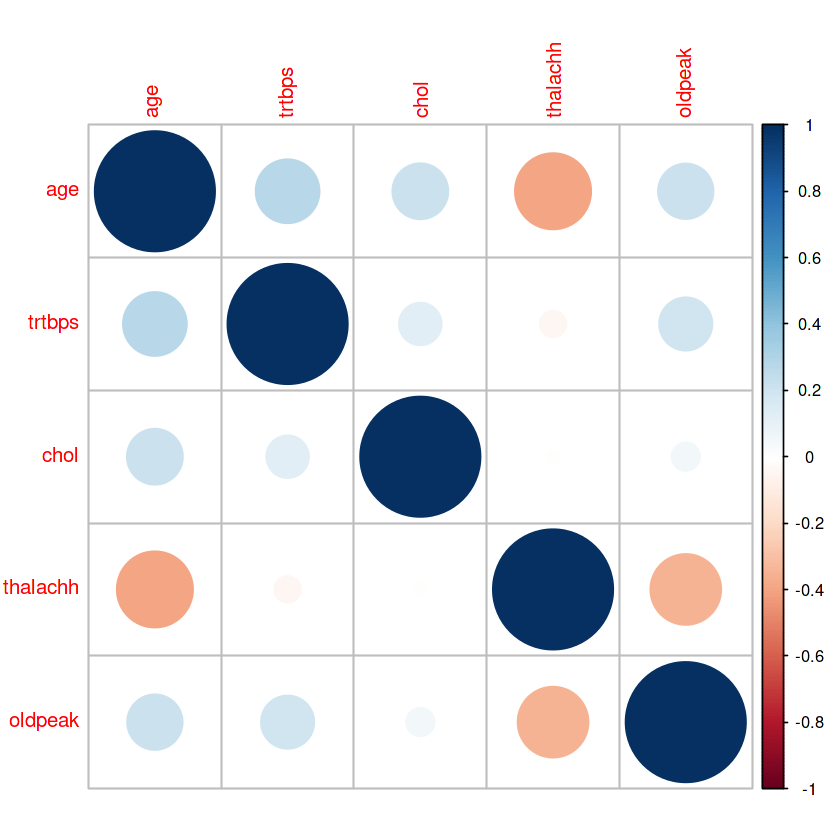

In [7]:
corr = cor(numeric_var)
head(round(corr,2))
corrplot(corr, method="circle")

Age has satisfactory correlation with other variables which seems confusing as many of symptoms, say blood pressure, diabetes etc are more probable as we grow old.

### Categorical Variables

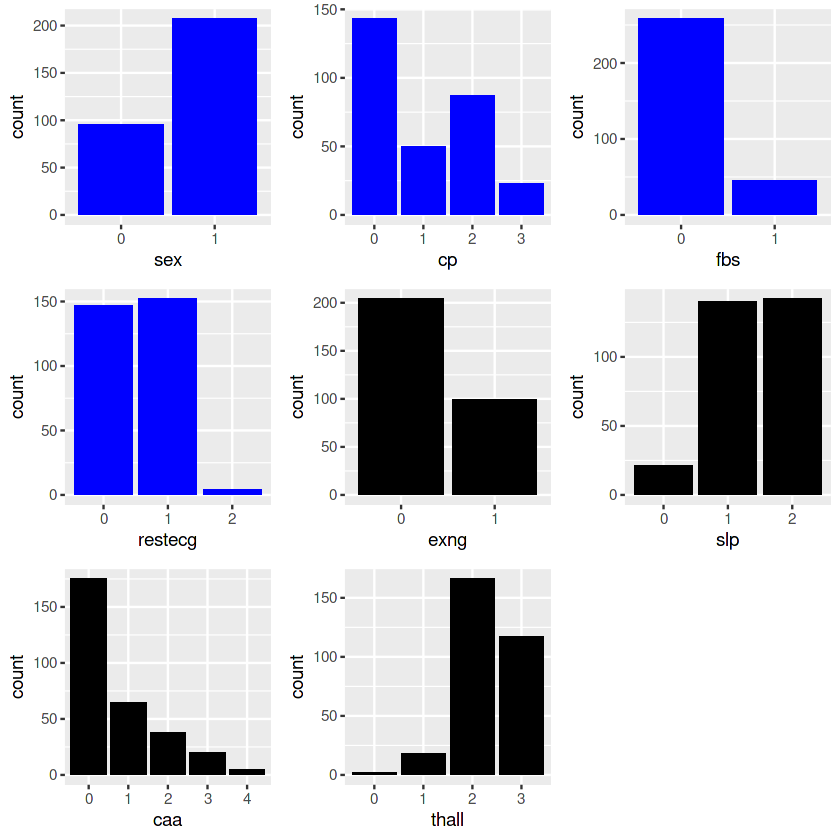

In [8]:
bp1 <- ggplot(cata_var,aes(x=factor(sex)))+geom_bar(fill = "blue")+xlab("sex")
bp2 <- ggplot(cata_var,aes(x=factor(cp)))+geom_bar(fill = "blue")+xlab("cp")
bp3 <- ggplot(cata_var,aes(x=factor(fbs)))+geom_bar(fill = "blue")+xlab("fbs")
bp4 <- ggplot(cata_var,aes(x=factor(restecg)))+geom_bar(fill = "blue")+xlab("restecg")
bp5 <- ggplot(cata_var,aes(x=factor(exng)))+geom_bar(fill = "black")+xlab("exng")
bp6 <- ggplot(cata_var,aes(x=factor(slp)))+geom_bar(fill = "black")+xlab("slp")
bp7 <- ggplot(cata_var,aes(x=factor(caa)))+geom_bar(fill = "black")+xlab("caa")
bp8 <- ggplot(cata_var,aes(x=factor(thall)))+geom_bar(fill = "black")+xlab("thall")
grid.arrange(bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8, nrow=3)

We have already converted above variables from int to factors, no modification further. However, we can drop a variable or even try to reduce the levels of factors which might give a better model, for example 'cp' has 4 types 
* cp : Chest Pain type
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
    + Value 4: asymptomatic  

We can change value 1,2,3 as 1 and 4 as 0 giving two levels or value 3,4 as 0 and 1,2 as 1. But it can also create problems, which value type is related to heart issues and which is not, can be correctly configured by a medical professional. So, if you know about this, please try.


### Recombining Numerical and Categorical Variables and splitting dataset to test and train

In [9]:
dataset_recombined = cbind(cata_var,numeric_var)
str(dataset_recombined)

'data.frame':	303 obs. of  14 variables:
 $ sex     : Factor w/ 2 levels "0","1": 2 2 1 2 1 2 1 2 2 2 ...
 $ cp      : Factor w/ 4 levels "0","1","2","3": 4 3 2 2 1 1 2 2 3 3 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 2 1 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 1 2 1 2 2 2 1 2 2 2 ...
 $ exng    : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ slp     : Factor w/ 3 levels "0","1","2": 1 1 3 3 3 2 2 3 3 3 ...
 $ caa     : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ thall   : Factor w/ 4 levels "0","1","2","3": 2 3 3 3 3 2 3 4 4 3 ...
 $ output  : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ trtbps  : int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ thalachh: int  150 187 172 178 163 148 153 173 162 174 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...


As we can see, now data type is specified int and factors but output is in the midst of dataset, I would prefer to move it to last column. Lets glimpse the dataset recombined.

In [10]:
head(dataset_recombined)

sex cp fbs restecg exng slp caa thall output age trtbps chol thalachh oldpeak
1 1   3  1   0       0    0   0   1     1      63  145    233  150      2.3    
2 1   2  0   1       0    0   0   2     1      37  130    250  187      3.5    
3 0   1  0   0       0    2   0   2     1      41  130    204  172      1.4    
4 1   1  0   1       0    2   0   2     1      56  120    236  178      0.8    
5 0   0  0   1       1    2   0   2     1      57  120    354  163      0.6    
6 1   0  0   1       0    1   0   1     1      57  140    192  148      0.4

Lets move the output variable to last column and split the data.

In [11]:
set.seed(45)
dataset_recombined = dataset_recombined %>% relocate(output, .after= last_col())
split = sample.split(dataset_recombined$output, SplitRatio = 0.75)
training_set = subset(dataset_recombined, split == TRUE)
test_set = subset(dataset_recombined, split == FALSE)

Lets move to scaling and normalizing the numerical variables.

In [12]:
#scale
training_set[c(10)] <- lapply(training_set[c(10)], function(x) c(scale(x)))
test_set[c(10)] <- lapply(test_set[c(10)], function(x) c(scale(x)))

#Normalise
normalize <- function(x){((x-min(x)) /(max(x)-min(x)))}

training_set[c(9,13)] <- lapply(training_set[c(9,13)], normalize)
test_set[c(9,13)] <- lapply(test_set[c(9,13)], normalize)

Checking training_data and test_data to see if everything is in order.

In [13]:
head(training_set)

sex cp fbs restecg exng slp caa thall age        trtbps      chol thalachh
1 1   3  1   0       0    0   0   1     0.67441860  0.84372896 233  150     
2 1   2  0   1       0    0   0   2     0.06976744 -0.05324121 250  187     
3 0   1  0   0       0    2   0   2     0.16279070 -0.05324121 204  172     
4 1   1  0   1       0    2   0   2     0.51162791 -0.65122133 236  178     
5 0   0  0   1       1    2   0   2     0.53488372 -0.65122133 354  163     
6 1   0  0   1       0    1   0   1     0.53488372  0.54473890 192  148     
  oldpeak    output
1 0.52272727 1     
2 0.79545455 1     
3 0.31818182 1     
4 0.18181818 1     
5 0.13636364 1     
6 0.09090909 1

In [14]:
head(test_set)

sex cp fbs restecg exng slp caa thall age       trtbps     chol thalachh
12 0   2  0   1       0    2   0   2     0.4042553 -0.1949409 275  139     
17 0   2  0   1       0    2   0   2     0.6170213 -0.7008429 340  172     
25 1   3  0   1       1    2   0   3     0.2340426  0.3109611 199  178     
27 1   2  1   1       0    2   0   2     0.6382979  0.8168631 212  157     
28 1   2  0   1       0    2   0   2     0.4680851 -1.2067449 175  123     
34 1   2  0   0       0    0   1   2     0.5319149 -0.4478919 273  152     
   oldpeak    output
12 0.03225806 1     
17 0.00000000 1     
25 0.22580645 1     
27 0.25806452 1     
28 0.09677419 1     
34 0.08064516 1

Looks good. Lets proceed to implement classification by linear SVM model from library e1071

### Implementing SVM

In [15]:
classifier = svm(formula = output ~ .,
                 data = training_set,
                 type = 'C-classification',
                 kernel = 'linear'
                 )

### Prediction and Analysis of the model

Plotting precesion vs recall graph and the ROC curve.

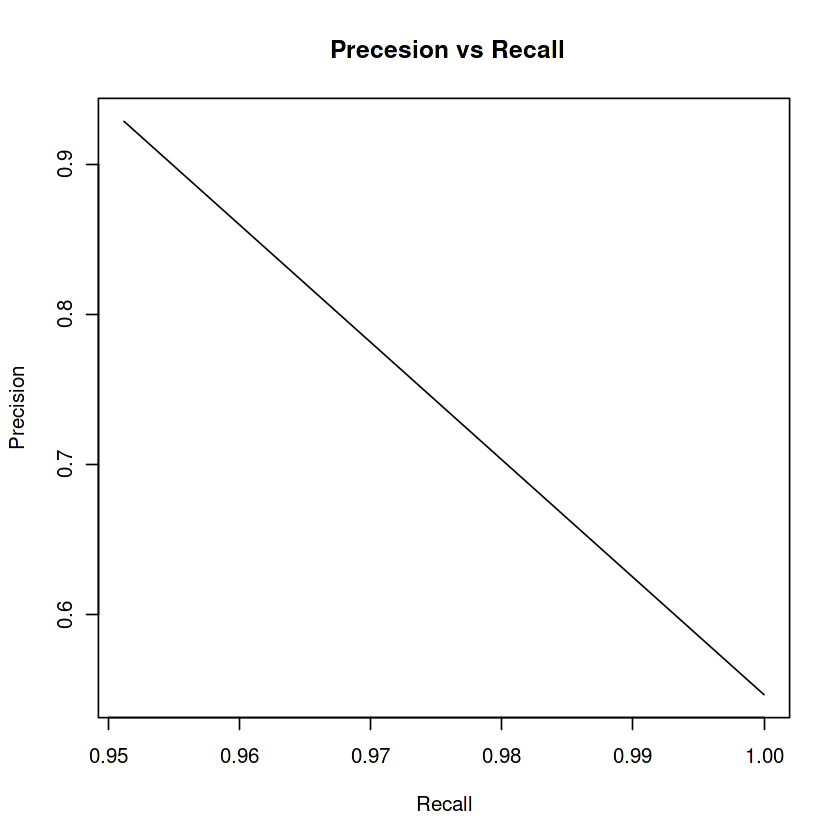

ROC Curve Accuracy= 93.149

In [16]:
y_pred = predict(classifier, newdata = test_set[-14])
y <- test_set[,14]
pred <- prediction(as.numeric(y_pred),as.numeric(y))
RP.perf <- performance(pred, "prec", "rec")
plot(RP.perf,main=" Precesion vs Recall")
ROC.perf <- performance(pred, "tpr", "fpr")
plot(ROC.perf,,main="True +ve rate vs False +ve rate")
auc.tmp <- performance(pred, "auc")
auc <- as.numeric(auc.tmp@y.values)
cat("ROC Curve Accuracy=", round(auc*100,3))

ROC curve analysis shows that model accuracy is 93.14% on the test data. Now, lets see the confusion matrix from an other library 'caret' and prediction accuracy from the same.

In [17]:
confusionMatrix(table(y_pred, y))

Confusion Matrix and Statistics

      y
y_pred  0  1
     0 31  2
     1  3 39
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8512, 0.978)
    No Information Rate : 0.5467         
    P-Value [Acc > NIR] : 1.576e-13      
                                         
                  Kappa : 0.8652         
                                         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 0.9118         
            Specificity : 0.9512         
         Pos Pred Value : 0.9394         
         Neg Pred Value : 0.9286         
             Prevalence : 0.4533         
         Detection Rate : 0.4133         
   Detection Prevalence : 0.4400         
      Balanced Accuracy : 0.9315         
                                         
       'Positive' Class : 0              
                                         

### Conclusion
Model has 93.14% accuracy. However, dataset is small and changing even one feature from the dataset changes the accuracy by a margin. Hence, this model and dataset can be used for learning purposes but not in the real world.